In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'..\stocks\AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,High,Low,Open,Close,Volume,Adj Close
2016-01-04,2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154
...,...,...,...,...,...,...,...
2021-02-05,2021-02-05,137.419998,135.860001,137.350006,136.759995,75524000.0,136.759995
2021-02-08,2021-02-08,136.960007,134.919998,136.029999,136.910004,71297200.0,136.910004
2021-02-09,2021-02-09,137.880005,135.850006,136.619995,136.009995,76774200.0,136.009995
2021-02-10,2021-02-10,136.990005,134.399994,136.479996,135.389999,73046600.0,135.389999


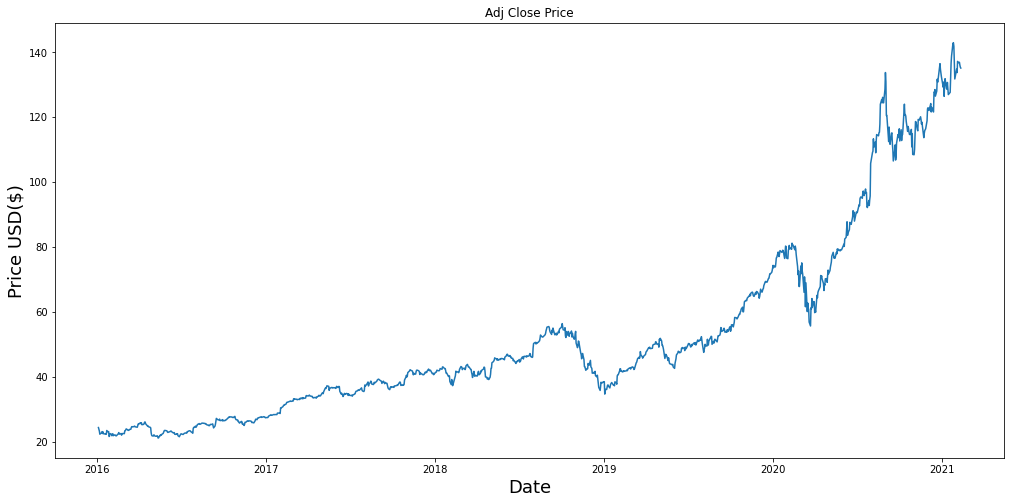

In [3]:
plt.figure(figsize=(17, 8))
plt.plot(df['Adj Close'], label = 'Adj Close')
plt.title('Adj Close Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD($)', fontsize = 18)
plt.show()

In [4]:
# Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

for i in range(1, len(df.Close)):
    
    if df.Close[i] > df.Close[i-1]:
        OBV.append(OBV[-1] + df.Volume[i])
        
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    
    else:
        OBV.append(OBV[-1])

In [5]:
# Store the OBV and OBV Exponential Moving Average (EMA) into new columns
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
df

,Date,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
2016-01-04,2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536,0.000000e+00,0.000000e+00
2016-01-05,2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977,-2.231640e+08,-1.171611e+08
2016-01-06,2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116,-4.969936e+08,-2.566333e+08
2016-01-07,2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208,-8.213712e+08,-4.196644e+08
2016-01-08,2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154,-5.381792e+08,-4.483321e+08
...,...,...,...,...,...,...,...,...,...
2021-02-05,2021-02-05,137.419998,135.860001,137.350006,136.759995,75524000.0,136.759995,6.478272e+09,6.489241e+09
2021-02-08,2021-02-08,136.960007,134.919998,136.029999,136.910004,71297200.0,136.910004,6.549569e+09,6.494986e+09
2021-02-09,2021-02-09,137.880005,135.850006,136.619995,136.009995,76774200.0,136.009995,6.472795e+09,6.492873e+09
2021-02-10,2021-02-10,136.990005,134.399994,136.479996,135.389999,73046600.0,135.389999,6.399748e+09,6.484004e+09


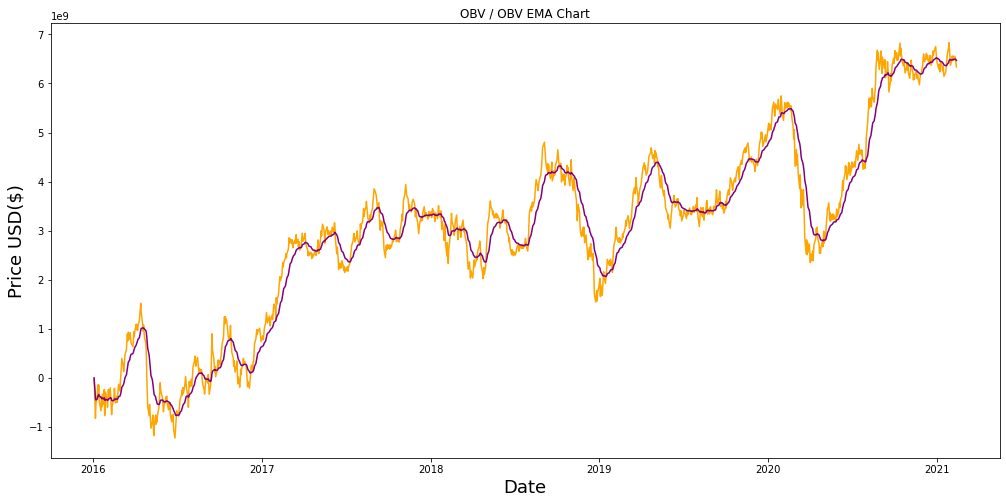

In [6]:
plt.figure(figsize=(17, 8))
plt.plot(df['OBV'], label = 'OBV', color = 'orange')
plt.plot(df['OBV_EMA'], label = 'OBV_EMA', color = 'purple')
plt.title('OBV / OBV EMA Chart')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD($)', fontsize = 18)
plt.show()

In [7]:
# Create my own FUNCTION
# if OBV > OBV_EMA Then Buy
# if OBV < OBV_EMA Then Sell
# Else Nothing

def buy_sell(signal, col1, col2):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(0, len(signal)):
        
        # if OBV > OBV_EMA Then Buy -> col1 => 'OBV' and col2 => 'OBV_EMA'
        if signal[col1][i] > signal[col2][i] and flag != 1:
            sigPriceBuy.append(signal['Close'][i])
            sigPriceSell.append(np.nan)
            flag = 1
            
        # if OBV < OBV_EMA Then Sell
        elif signal[col1][i] < signal[col2][i] and flag != 0:
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
            flag = 0
            
        else:
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(np.nan)
    
    return (sigPriceBuy, sigPriceSell)

In [8]:
# Buy and sell columns
x = buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
df

,Date,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
2016-01-04,2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536,0.000000e+00,0.000000e+00,NaN,NaN
2016-01-05,2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977,-2.231640e+08,-1.171611e+08,NaN,25.677500
2016-01-06,2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116,-4.969936e+08,-2.566333e+08,NaN,NaN
2016-01-07,2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208,-8.213712e+08,-4.196644e+08,NaN,NaN
2016-01-08,2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154,-5.381792e+08,-4.483321e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,2021-02-05,137.419998,135.860001,137.350006,136.759995,75524000.0,136.759995,6.478272e+09,6.489241e+09,NaN,136.759995
2021-02-08,2021-02-08,136.960007,134.919998,136.029999,136.910004,71297200.0,136.910004,6.549569e+09,6.494986e+09,136.910004,NaN
2021-02-09,2021-02-09,137.880005,135.850006,136.619995,136.009995,76774200.0,136.009995,6.472795e+09,6.492873e+09,NaN,136.009995
2021-02-10,2021-02-10,136.990005,134.399994,136.479996,135.389999,73046600.0,135.389999,6.399748e+09,6.484004e+09,NaN,NaN


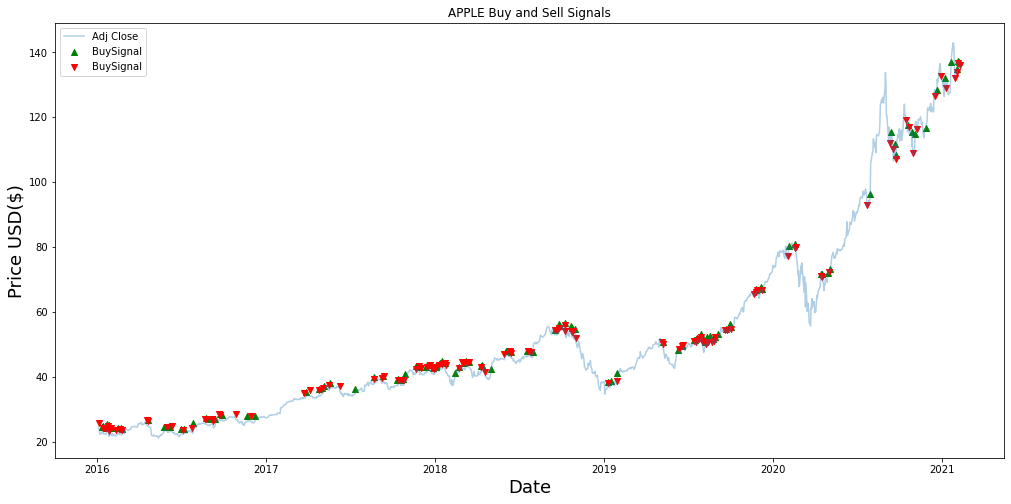

In [9]:
# Plot buy and sell prices
plt.figure(figsize=(17, 8))
plt.plot(df['Adj Close'], label = 'Adj Close', alpha = 0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'BuySignal', marker = '^', alpha = 1, color = 'green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'BuySignal', marker = 'v', alpha = 1, color = 'red')
plt.title('APPLE Buy and Sell Signals')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD($)', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()

In [10]:
###